### Expand 2.5 studies to include 2020 data, clean all datasets, and determine states with highest and lowest levels of PM2.5.

The EPA's primary and secondary standard for PM2.5 in 1999 was 15 µg/m3 annual mean (averaged over three years). In 2012 the primary standard was 12 µg/m3 annual mean (averaged over three years) and the secondary standard was 15 µg/m3 annual mean (averaged over three years). The EPA's current primary and secondary standards for PM2.5 remain unchanged since 2012. Levels above 15 µg/m3 and 12 µg/m3 exceed the standards. I will look at only one year at a time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
### Read in 1999, 2012, and 2020 PM2.5 dataset
pm0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_1999.csv') 
pm1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012.csv') 
pm2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020.csv') 

### Exploratory data analysis on 2020 dataset

In [3]:
#print summary info for the 2020 dataset as it wasn't done in the first PM2.5 studies notebook
print(pm2.info())
print(pm2.ndim) 
print(pm2.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554830 entries, 0 to 554829
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           554830 non-null  int64  
 1   County Code          554830 non-null  int64  
 2   Site Num             554830 non-null  int64  
 3   Parameter Code       554830 non-null  int64  
 4   POC                  554830 non-null  int64  
 5   Latitude             554830 non-null  float64
 6   Longitude            554830 non-null  float64
 7   Datum                554830 non-null  object 
 8   Parameter Name       554830 non-null  object 
 9   Sample Duration      554830 non-null  object 
 10  Pollutant Standard   311371 non-null  object 
 11  Date Local           554830 non-null  object 
 12  Units of Measure     554830 non-null  object 
 13  Event Type           554830 non-null  object 
 14  Observation Count    554830 non-null  int64  
 15  Observation Perce

In [4]:
#There are 554,830 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
pm2.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR


In [5]:
#Look at the first five rows and next 9 columns
pm2.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,2020-01-01,Micrograms/cubic meter (LC),None,1,100.0,11.6,11.6,0,48.0
1,2020-01-04,Micrograms/cubic meter (LC),None,1,100.0,3.2,3.2,0,13.0
2,2020-01-07,Micrograms/cubic meter (LC),None,1,100.0,3.3,3.3,0,14.0
3,2020-01-10,Micrograms/cubic meter (LC),None,1,100.0,9.3,9.3,0,39.0
4,2020-01-13,Micrograms/cubic meter (LC),None,1,100.0,6.9,6.9,0,29.0


In [6]:
#Look at the first five rows and the final columns
pm2.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
1,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
2,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
3,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21
4,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-04-21


In [7]:
pm2['Arithmetic Mean'].describe()

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

Since values should seemingly <b>not</b> be negative, I contacted the EPA via email to understand the negative values. I received this response: 

"Thanks for your message and reaching out. We have a short write up on acceptable values in EPA's Air Quality System (AQS) here: https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_acceptable_values, but since that explanation is very short I can elaborate.

Every instrument has an allowable uncertainty, and occasionally as you've noted monitors can yield small negative hourly values. Say it's +/- 10 ppb for whatever substance. If the instrument reads 100 ppb, that means the real concentration will be somewhere between 90 and 110. If the instrument reads -3 that means the real value can be anywhere between 0 and 7 (negative concentrations not being possible). We allow reporting of the negative values to capture valid, quality assured readings that are valid members of the sample set. With PM2.5 monitors, negative hourly concentrations for PM2.5 down to -4.99 ug/m3 (the default QC range check) are used in computing 24-hour averages so as not to bias that average."

In [8]:
#Look into negative values in the 2012 dataset
pm1LessThan0 = pm1[pm1['Arithmetic Mean'] < 0]
pm1LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
4018,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4042,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4063,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4065,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4175,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275005,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275006,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275012,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275063,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30


In [9]:
#Look into negative values in the 2012 dataset
pm2LessThan0 = pm2[pm2['Arithmetic Mean'] < 0]
pm2LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
3809,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
3816,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4163,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4170,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
5564,2,110,4,88101,3,58.388497,-134.567237,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Floyd Dryden Middle School,3800 MENDENHALL LOOP ROAD,Alaska,Juneau,Juneau,"Juneau, AK",2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553629,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553633,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553634,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553635,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16


The 2012 dataset has 1130 negative sample values and the 2020 dataset has 2755 negative sample values

In [10]:
#sample duration stands out
print(pm1LessThan0.groupby('Sample Duration').size())
print(pm2LessThan0.groupby('Sample Duration').size())

Sample Duration
1 HOUR           606
24-HR BLK AVG    524
dtype: int64
Sample Duration
1 HOUR           1481
24-HR BLK AVG    1274
dtype: int64


In [11]:
#look at sample durations for all datasets
pm0SampleDuration = pm0.groupby('Sample Duration').size()
pm1SampleDuration = pm1.groupby('Sample Duration').size()
pm2SampleDuration = pm2.groupby('Sample Duration').size()
print(pm0SampleDuration)
print(pm1SampleDuration)
print(pm2SampleDuration)

Sample Duration
24 HOUR    103210
dtype: int64
Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64
Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64


The negative values in the 2012 and 2020 datasets were either 1 hour or 24-hour block averages. 

Text(0.5, 1.0, 'PM 2.5 Sample Durations by Year')

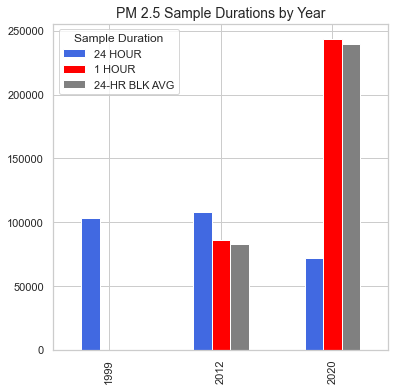

In [12]:
#Show bar chart of types of sample durations in 1999, 2012, and 2020
concatenatedSampleDurations = pd.concat([pm0SampleDuration, pm1SampleDuration, pm2SampleDuration], axis = 1, keys = ['1999', '2012', '2020'])
transposedSampleDurations = concatenatedSampleDurations.transpose()

palette = ['royalblue', 'red','gray']
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (6,6)}, palette=palette)
ax = transposedSampleDurations.plot(kind = 'bar')
ax.set_title('PM 2.5 Sample Durations by Year', fontsize=14)

In [13]:
plt.close()

It is clear that the trend is moving away from reporting of 24 hour samples only. Particularly in 2020, the number of 24 hour samples is far smaller than the number of 1 hour and 24-hour block average samples. Looking at the csv files, sites routinely had both 1 hour samples and 24-hr block averages on the same day. 

### Cleaning datasets

While looking at the csv file for the 2012 PM2.5 data, I noticed there were results included for non U.S. states. 
Also, after re-reading the datafile descriptions, I will check whether there are any results for
excluded events. Thus, cleaning of datasets will include (1) removal of all 1 hour samples, (2) removal of excluded event observations, (3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date, and (4) removal of non U.S. states.

#### 1999 dataset

In [14]:
len(pm0)

103210

In [15]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm0SampleDuration = pm0.groupby('Sample Duration').size()
pm0SampleDuration

Sample Duration
24 HOUR    103210
dtype: int64

In [16]:
#Check whether there are excluded observations in event type
pm0.groupby('Event Type').size()

Event Type
Included       597
None        102613
dtype: int64

In [17]:
#Check whether there are non U.S. states
pm0['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [18]:
len(pm0['State Name'].unique())

52

In [19]:
print(np.count_nonzero(pm0['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm0['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm0['State Name']== 'Virgin Islands' ))

667
1098
25


In [20]:
#remove observations from District Of Columbia, Puerto Rico, and Virgin Islands
pm0Cleaned = pm0[(pm0['State Name'] != 'District Of Columbia') & (pm0['State Name'] != 'Puerto Rico')
                 & (pm0['State Name'] != 'Virgin Islands')]

In [21]:
len(pm0Cleaned)

101420

In [22]:
#save cleaned dataset 
pm0Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_88101_1999_cleaned.csv', header = True)

#### 2012 dataset

In [23]:
len(pm1)

276671

In [24]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm1SampleDuration = pm1.groupby('Sample Duration').size()
pm1SampleDuration

Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64

In [25]:
#remove 1 hour samples from 2012 dataset
pm1Non1HR = pm1[pm1['Sample Duration'] !=  '1 HOUR']
len(pm1Non1HR)

191001

In [26]:
#Check whether there are excluded observations in event type. 
pm1.groupby('Event Type').size()

Event Type
Excluded      2077
Included     31903
None        242691
dtype: int64

In [27]:
#remove excluded observations
pm1Non1HrNonExcluded = pm1Non1HR[pm1Non1HR['Event Type'] !=  'Excluded']
len(pm1Non1HrNonExcluded)

189973

In [28]:
pm1Non1HrNonExcludedSorted = pm1Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])
#pm1Non1HrNonExcludedSorted

In [29]:
#remove 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date
pm1NonDuplicate = pm1Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'],
            keep='first')
len(pm1NonDuplicate)

165133

In [30]:
#Check whether there are non U.S. states
pm1['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [31]:
len(pm1['State Name'].unique())

51

In [32]:
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm1NonDuplicate['State Name']== 'Virgin Islands' ))

809
913
36


In [33]:
#remove observations from District Of Columbia, Puerto Rico, and Virgin Islands
pm1Cleaned = pm1NonDuplicate[(pm1NonDuplicate['State Name'] != 'District Of Columbia') 
                 & (pm1NonDuplicate['State Name'] != 'Puerto Rico')
                 & (pm1NonDuplicate['State Name'] != 'Virgin Islands')]

In [34]:
len(pm1Cleaned)

163375

In [35]:
#save cleaned dataset 
pm1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_88101_2012_cleaned.csv', header = True)

#### 2020 dataset

In [36]:
len(pm2)

554830

In [37]:
#Previously accomplished, but repeated to keep together. Check for 1 hour samples.
pm2SampleDuration = pm2.groupby('Sample Duration').size()
pm2SampleDuration

Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64

In [38]:
#remove 1 hour samples from 2020 dataset
pm2Non1HR = pm2[pm2['Sample Duration'] !=  '1 HOUR']
len(pm2Non1HR)

311371

In [39]:
#Check whether there are excluded observations in event type
pm2.groupby('Event Type').size()

Event Type
Excluded      1504
Included     20040
None        533286
dtype: int64

In [40]:
#remove excluded observations
pm2Non1HrNonExcluded = pm2Non1HR[pm2Non1HR['Event Type'] !=  'Excluded']
len(pm2Non1HrNonExcluded)

310614

In [41]:
#sort by state, county, site number, and date
pm2Non1HrNonExcludedSorted = pm2Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])

In [42]:
#where duplicate dates occur for a given state code, county code, and site number, keep the first observation (24 hour)
pm2NonDuplicate = pm2Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'], keep='first')
len(pm2NonDuplicate)

263391

In [43]:
#Check whether there are non U.S. states
pm2['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands', 'Country Of Mexico'], dtype=object)

In [44]:
len(pm2['State Name'].unique())

54

In [45]:
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Puerto Rico'))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Virgin Islands' ))
print(np.count_nonzero(pm2NonDuplicate['State Name']== 'Country Of Mexico' ))

1427
403
134
180


In [46]:
#remove observations from District Of Columbia, Puerto Rico, Virgin Islands, and Mexico
pm2Cleaned = pm2NonDuplicate[(pm2NonDuplicate['State Name'] != 'District Of Columbia') 
                 & (pm2NonDuplicate['State Name'] != 'Puerto Rico')
                 & (pm2NonDuplicate['State Name'] != 'Virgin Islands')
                 & (pm2NonDuplicate['State Name'] != 'Country Of Mexico')]

In [47]:
len(pm2Cleaned)

261247

In [48]:
#save cleaned csv
pm2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_88101_2020_cleaned.csv', header = True)

### Extract arithmetic mean columns from datasets and print descriptive statistics

Original (uncleaned) and cleaned datasets

In [49]:
#uncleaned 1999
x0 = pm0['Arithmetic Mean']
x0.describe()

count    103210.000000
mean         13.776391
std           9.425582
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Arithmetic Mean, dtype: float64

In [50]:
#cleaned 1999 
x0_cleaned = pm0Cleaned['Arithmetic Mean']
x0_cleaned.describe()

count    101420.000000
mean         13.814669
std           9.453117
min           0.000000
25%           7.200000
50%          11.600000
75%          18.000000
max         157.100000
Name: Arithmetic Mean, dtype: float64

In [51]:
#uncleaned 2012
x1 = pm1['Arithmetic Mean']
x1.describe()

count    276671.000000
mean          9.141456
std           6.520117
min          -6.312500
25%           5.100000
50%           7.916667
75%          11.700000
max         236.254167
Name: Arithmetic Mean, dtype: float64

In [52]:
#cleaned 2012
x1_cleaned = pm1Cleaned['Arithmetic Mean']
x1_cleaned.describe()

count    163375.000000
mean          9.092652
std           6.266262
min          -3.500000
25%           5.200000
50%           7.900000
75%          11.600000
max         236.200000
Name: Arithmetic Mean, dtype: float64

In [53]:
#uncleaned 2020
x2 = pm2['Arithmetic Mean']
x2.describe()

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

In [54]:
#cleaned 2020
x2_cleaned = pm2Cleaned['Arithmetic Mean']
x2_cleaned.describe()

count    261247.000000
mean          8.093487
std          10.731828
min          -4.900000
25%           4.300000
50%           6.500000
75%           9.400000
max         824.100000
Name: Arithmetic Mean, dtype: float64

### Compare changes in numbers of PM2.5 test sites

#### 1999

In [55]:
pm0Sites = pm0Cleaned[['State Name', 'County Name', 'Site Num']].groupby(['State Name', 'County Name']).agg(['nunique'])
pm0Sites

Site Num
                        nunique
State Name County Name         
Alabama    Clay               1
           Colbert            1
           DeKalb             1
           Houston            1
           Jefferson          5
...                         ...
Wisconsin  Wood               1
Wyoming    Campbell           3
           Converse           1
           Laramie            1
           Sheridan           2

[583 rows x 1 columns]

In [56]:
#what are the total number of sites?
totalpm0Sites = pm0Sites['Site Num'].sum()
totalpm0Sites

nunique    938
dtype: int64

In [57]:
pm0Sites.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 583 entries, ('Alabama', 'Clay') to ('Wyoming', 'Sheridan')
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   (Site Num, nunique)  583 non-null    int64
dtypes: int64(1)
memory usage: 10.6+ KB


In [58]:
pm0Sites = pm0Sites.reset_index().copy()
pm0Sites.head()

,State Name,County Name,Site Num
,,,nunique
0,Alabama,Clay,1
1,Alabama,Colbert,1
2,Alabama,DeKalb,1
3,Alabama,Houston,1
4,Alabama,Jefferson,5


In [59]:
#see how many sites are in all counties of a specific state, i.e. California
pm0CaliforniaCountySites = pm0Sites[pm0Sites['State Name'] == 'California']
pm0CaliforniaCountySites

,State Name,County Name,Site Num
,,,nunique
42,California,Alameda,2
43,California,Butte,1
44,California,Calaveras,1
45,California,Colusa,1
46,California,Contra Costa,1
47,California,El Dorado,1
48,California,Fresno,2
49,California,Humboldt,1
50,California,Imperial,3


In [60]:
#see how many sites are in each state
pm0SitesState = pm0Sites['Site Num'].groupby(pm0Sites['State Name']).sum()

In [61]:
pm0SitesStateSorted = pm0SitesState.sort_values('nunique', ascending = False)
pm0SitesStateSorted

,nunique
State Name,
California,76
Texas,41
Ohio,37
Pennsylvania,35
North Carolina,35
New York,33
Indiana,32
Wisconsin,28
Florida,28


#### 2012

In [62]:
pm1Sites = pm1Cleaned[['State Name', 'County Name', 'Site Num']].groupby(['State Name', 'County Name']).agg(['nunique'])

In [63]:
#what are the total number of sites?
totalpm1Sites = pm1Sites['Site Num'].sum()
totalpm1Sites

nunique    867
dtype: int64

In [64]:
pm1Sites = pm1Sites.reset_index().copy()

In [65]:
#see how many sites are in each state
pm1SitesState = pm1Sites['Site Num'].groupby(pm1Sites['State Name']).sum()

In [66]:
pm1SitesStateSorted = pm1SitesState.sort_values('nunique', ascending = False)
pm1SitesStateSorted

,nunique
State Name,
California,114
Ohio,43
Pennsylvania,40
North Carolina,35
Indiana,32
Michigan,28
Georgia,28
Florida,26
Wyoming,23


#### 2020

In [67]:
pm2Sites = pm2Cleaned[['State Name', 'County Name', 'Site Num']].groupby(['State Name', 'County Name']).agg(['nunique'])

In [68]:
#what are the total number of sites?
totalpm2Sites = pm2Sites['Site Num'].sum()
totalpm2Sites

nunique    955
dtype: int64

In [69]:
pm2Sites = pm2Sites.reset_index().copy()

In [70]:
#see how many sites are in each state
pm2SitesState = pm2Sites['Site Num'].groupby(pm2Sites['State Name']).sum()

In [71]:
pm2SitesStateSorted = pm2SitesState.sort_values('nunique', ascending = False)
pm2SitesStateSorted

,nunique
State Name,
California,121
Pennsylvania,48
Ohio,44
Texas,43
Indiana,35
Illinois,34
Florida,26
Michigan,23
Tennessee,23


### Compare aggregate changes in PM2.5 for years 1999, 2012, and 2020

Text(0, 0.5, 'pm2.5 levels (µg/m3)')

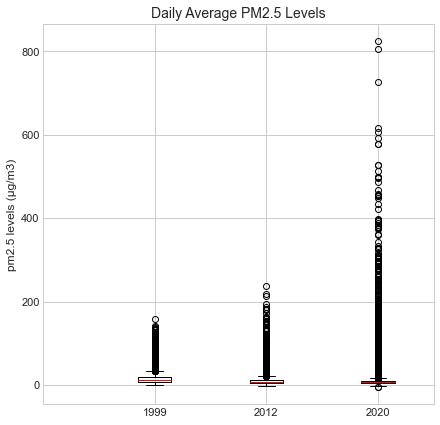

In [72]:
#make boxplots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = [7, 7]) #make larger

years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years)
plt.title('Daily Average PM2.5 Levels', fontsize=14)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('pm2.5 levels (µg/m3)', fontsize=12)

In [73]:
plt.close()

Text(0, 0.5, 'pm2.5 levels (µg/m3)')

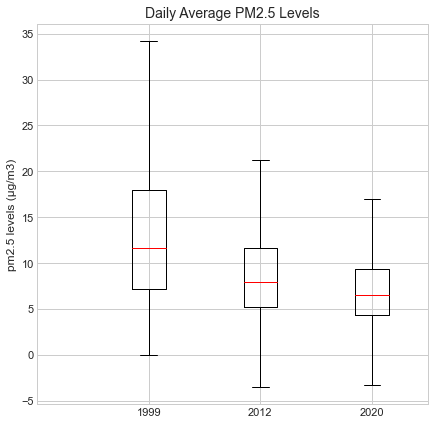

In [74]:
#re-plot arithmetic means for 1999, 2012, and 2020 removing the outliers
fig1 = plt.figure(figsize = [7, 7]) #make larger

years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years, showfliers = False)
plt.title('Daily Average PM2.5 Levels', fontsize=14)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('pm2.5 levels (µg/m3)', fontsize=12)

In [75]:
plt.close()

Text(0.5, 0, '')

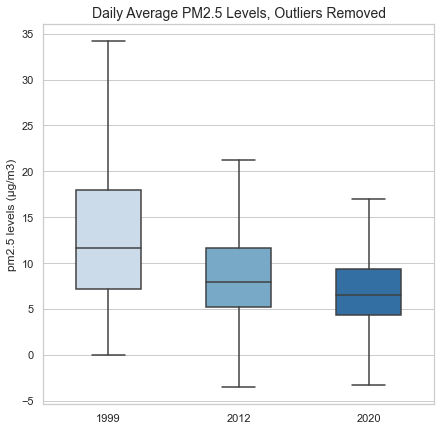

In [76]:
#Use seaborn for boxplots and remove outliers
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0_cleaned.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1_cleaned.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2_cleaned.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,7)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, width = 0.5, palette='Blues', showfliers = False)  
ax.set_title('Daily Average PM2.5 Levels, Outliers Removed', fontsize=14)
ax.set_ylabel('pm2.5 levels (µg/m3)')
ax.set_xlabel('')

In [77]:
fig.savefig('pm25_2_boxplot')

In [78]:
plt.close()

### How have state levels of PM2.5 changed over time?

In [79]:
#calculate the mean of PM2.5 for each state in 1999, 2012, and 2020
mn0 = pm0Cleaned['Arithmetic Mean'].groupby(pm0Cleaned['State Name']).mean()
mn1 = pm1Cleaned['Arithmetic Mean'].groupby(pm1Cleaned['State Name']).mean()
mn2 = pm2Cleaned['Arithmetic Mean'].groupby(pm2Cleaned['State Name']).mean()

In [80]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d0.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d1.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg = pd.merge(d0, d1, on = 'State Name')

In [81]:
mrg.head()

,State Name,Mean_x,Mean_y
0,Alabama,19.951238,9.774805
1,Alaska,6.665929,6.043637
2,Arizona,10.795547,8.713038
3,Arkansas,15.676067,10.427459
4,California,17.653481,9.351435


In [82]:
#save d1, a dataframe for PM2.5 arithmetic means grouped by states, for future studies
d1.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\88101_2012_byState.csv', header = True)

[Text(1, 0, '1999'), Text(3, 0, '2012')]

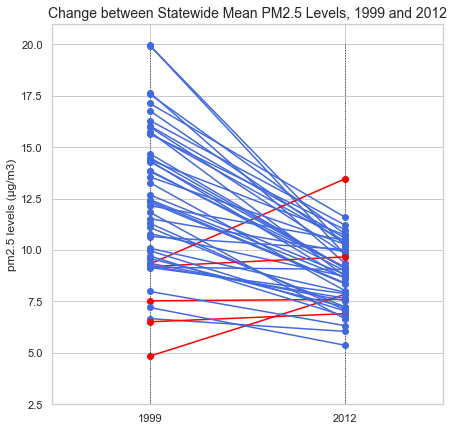

In [83]:
#This is a repeat of the analysis done in PM2.5 studies; however, the 1999 and 2012 datasets were cleaned in this study
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg['Mean_x'], mrg['Mean_y'], mrg['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Labels
ax.set_title('Change between Statewide Mean PM2.5 Levels, 1999 and 2012', fontsize=14)
ax.set(xlim=(0,4), ylim=(2.5,21), ylabel='pm2.5 levels (µg/m3)')
ax.set_xticks([1,3])
ax.set_xticklabels(['1999', '2012'])

In [84]:
fig.savefig('pm25_2statewideslopechart_99_12')

In [85]:
plt.close()

In [86]:
#which states have increased levels of PM2.5?
pm0StateIncrease = mrg[mrg['Mean_y'] > mrg['Mean_x']]
pm0StateIncrease = pm0StateIncrease.sort_values('Mean_x', ascending = False).copy()
pm0StateIncrease

,State Name,Mean_x,Mean_y
11,Idaho,9.321034,13.464291
23,Montana,9.199872,9.667583
5,Colorado,7.533304,7.599202
28,New Mexico,6.511285,6.906947
10,Hawaii,4.843478,7.849123


In [87]:
#Add 2020 dataset and re-plot changes between 2012 and 2020
d2 = pd.DataFrame(mn2.to_frame().reset_index())
d2.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg1 = pd.merge(d1, d2, on = 'State Name')

In [88]:
mrg1.head()

,State Name,Mean_x,Mean_y
0,Alabama,9.774805,8.247639
1,Alaska,6.043637,6.995130
2,Arizona,8.713038,8.575415
3,Arkansas,10.427459,7.848161
4,California,9.351435,12.364399


[Text(1, 0, '2012'), Text(3, 0, '2020')]

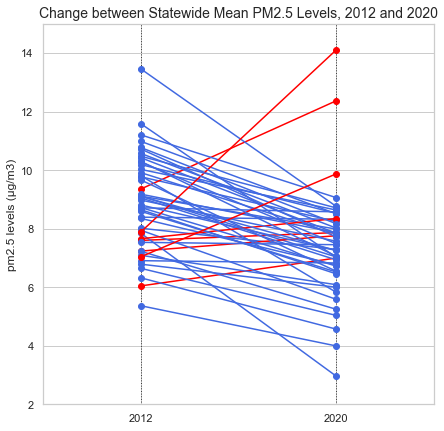

In [89]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1['Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean_y'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip( mrg1['Mean_x'], mrg1['Mean_y'], mrg1['State Name']):
    newline([1,p1], [3,p2] )
    
# Title and Labels
ax.set_title('Change between Statewide Mean PM2.5 Levels, 2012 and 2020', fontsize=14)
ax.set(xlim=(0,4), ylim=(2,15), ylabel='pm2.5 levels (µg/m3)') #use same limits as 1999 and 2012 chart
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [90]:
fig.savefig('pm25_2statewideslopechart_12_20')

In [91]:
plt.close()

[Text(1, 0, '2012'), Text(3, 0, '2020')]

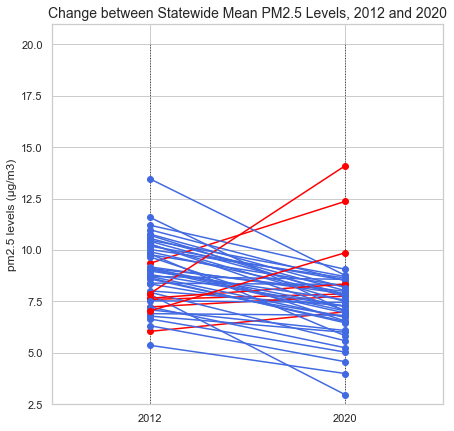

In [92]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1['Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean_y'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip( mrg1['Mean_x'], mrg1['Mean_y'], mrg1['State Name']):
    newline([1,p1], [3,p2] )
    
# Title and Labels
ax.set_title('Change between Statewide Mean PM2.5 Levels, 2012 and 2020', fontsize=14)
ax.set(xlim=(0,4), ylim=(2.5,21), ylabel='pm2.5 levels (µg/m3)') #use same limits as 1999 and 2012 chart
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [93]:
fig.savefig('pm25_2statewideslopechart_12_20samescale')

In [94]:
plt.close()

In [95]:
#which states have increased levels of PM2.5?
pm1StateIncrease = mrg1[mrg1['Mean_y'] > mrg1['Mean_x']]
pm1StateIncrease = pm1StateIncrease.sort_values('Mean_x', ascending = False).copy()
pm1StateIncrease

,State Name,Mean_x,Mean_y
4,California,9.351435,12.364399
34,Oregon,7.880513,14.096686
25,Nevada,7.656156,8.345796
5,Colorado,7.599202,7.866625
8,Florida,7.233325,7.759254
44,Washington,7.036542,9.867813
1,Alaska,6.043637,6.995130


### Which states have the highest levels of PM2.5?

In [96]:
d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State Name  49 non-null     object 
 1   Mean        49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [97]:
d0TopTen = d0.sort_values('Mean', ascending = False).head(10)
d0TopTen

,State Name,Mean
0,Alabama,19.951238
9,Georgia,19.943240
4,California,17.653481
33,Ohio,17.578823
40,Tennessee,17.129217
46,West Virginia,16.769652
12,Illinois,16.724550
22,Mississippi,16.297349
16,Kentucky,16.039906
18,Maryland,15.985083


Text(0.5, 1.0, '1999 Highest Levels of PM2.5')

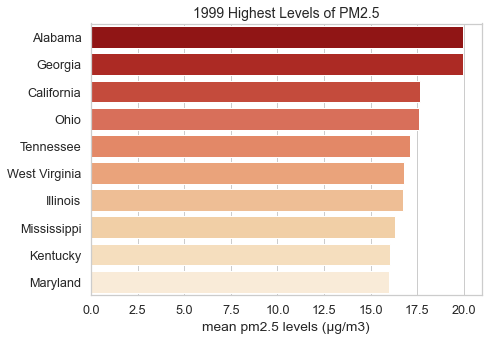

In [98]:
#create barplots
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,5)}, font_scale=1.15)
sns.barplot(x = d0TopTen['Mean'], y = d0TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Highest Levels of PM2.5', fontsize=14)

In [99]:
fig.savefig('pm25_2_1999highest_barchart')

In [100]:
plt.close()

In [101]:
#create a U.S. map showing annotated states with high levels of PM2.5
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
stateMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_state_5m\\cb_2014_us_state_5m.shp')
stateMap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.55..."
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.60337 33.47810 0.00000,..."
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-73.72777 41.10070 0.00000, -73.69..."
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-80.75164 24.85725 0.00000, ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
6,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"POLYGON Z ((-117.24267 44.39655 0.00000, -117...."
7,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,"POLYGON Z ((-91.51297 40.18106 0.00000, -91.51..."
8,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,"POLYGON Z ((-96.63970 42.73707 0.00000, -96.63..."
9,20,00481813,0400000US20,20,KS,Kansas,00,211752875517,1346704962,"POLYGON Z ((-102.05174 40.00308 0.00000, -101...."


In [102]:
stateMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [103]:
#reproject map to Mercator
stateMap = stateMap.to_crs("EPSG:3395")

In [104]:
#merge datasets
geo_merged0 = pd.merge(stateMap, d0, left_on='NAME', right_on='State Name', how='left')

In [105]:
d0Map = geo_merged0.sort_values('Mean', ascending = False)

In [106]:
d0TopTenMap = d0Map[:10]

In [107]:
d0TopTenMap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State Name,Mean
31,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,MULTIPOLYGON Z (((-9800984.638 3548540.267 0.0...,Alabama,19.951238
5,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9...",Georgia,19.943240
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,MULTIPOLYGON Z (((-13202867.311 3935367.958 0....,California,17.653481
20,39,01085497,0400000US39,39,OH,Ohio,00,105831263791,10266413579,MULTIPOLYGON Z (((-9210096.774 5073370.864 0.0...,Ohio,17.578823
49,47,01325873,0400000US47,47,TN,Tennessee,00,106800130794,2352882756,"POLYGON Z ((-10053249.521 4140691.863 0.000, -...",Tennessee,17.129217
30,54,01779805,0400000US54,54,WV,West Virginia,00,62266581604,489443020,"POLYGON Z ((-9199776.344 4576997.432 0.000, -9...",West Virginia,16.769652
7,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,"POLYGON Z ((-10187177.667 4864714.312 0.000, -...",Illinois,16.724550
13,28,01779790,0400000US28,28,MS,Mississippi,00,121531899917,3928587545,MULTIPOLYGON Z (((-9852963.159 3509975.582 0.0...,Mississippi,16.297349
38,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,MULTIPOLYGON Z (((-9952591.877 4348107.020 0.0...,Kentucky,16.039906
11,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,MULTIPOLYGON Z (((-8465693.320 4555204.525 0.0...,Maryland,15.985083


<AxesSubplot:title={'center':'1999 PM2.5 Top Ten States'}>

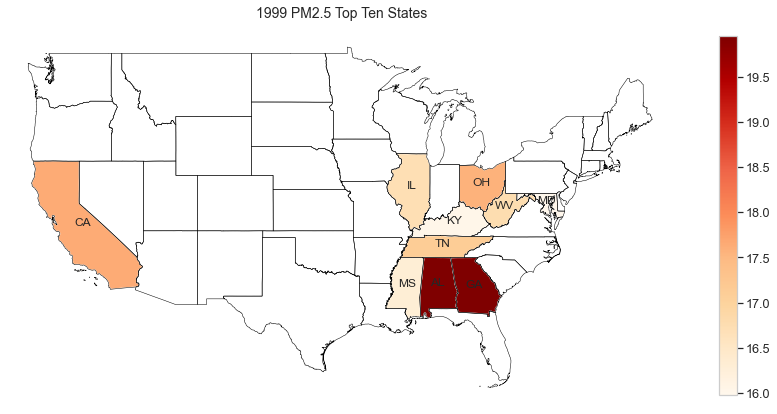

In [108]:
#plot 1999 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 PM2.5 Top Ten States', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#add state abbreviations to map
d0TopTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d0TopTenMap.plot(ax = ax, column='Mean', legend=True,cmap='OrRd',
                legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [109]:
fig.savefig('pm25_2_1999highest_map')

In [110]:
plt.close()

In [111]:
#repeat top ten visualizations for years 2012 and 2020
d1TopTen = d1.sort_values('Mean', ascending = False).head(10)
d1TopTen

,State Name,Mean
11,Idaho,13.464291
39,Tennessee,11.590931
21,Mississippi,11.207692
12,Indiana,10.987102
32,Ohio,10.775360
35,Pennsylvania,10.724850
15,Kentucky,10.573842
40,Texas,10.477064
3,Arkansas,10.427459
45,West Virginia,10.301948


Text(0.5, 1.0, '2012 Highest Levels of PM2.5')

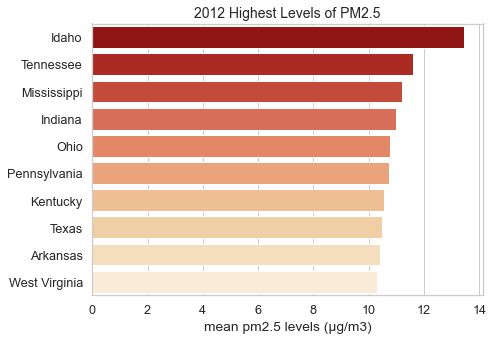

In [112]:
sns.barplot(x = d1TopTen['Mean'], y = d1TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Highest Levels of PM2.5', fontsize=14)

In [113]:
fig.savefig('pm25_2_2012highest_barchart')

In [114]:
plt.close()

In [115]:
#merge datasets
geo_merged1 = pd.merge(stateMap, d1, left_on='NAME', right_on='State Name', how='left')

In [116]:
d1Map = geo_merged1.sort_values('Mean', ascending = False)

In [117]:
d1TopTenMap = d1Map[:10]

In [118]:
d1TopTenMap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State Name,Mean
6,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"POLYGON Z ((-13051394.880 5497110.537 0.000, -...",Idaho,13.464291
49,47,01325873,0400000US47,47,TN,Tennessee,00,106800130794,2352882756,"POLYGON Z ((-10053249.521 4140691.863 0.000, -...",Tennessee,11.590931
13,28,01779790,0400000US28,28,MS,Mississippi,00,121531899917,3928587545,MULTIPOLYGON Z (((-9852963.159 3509975.582 0.0...,Mississippi,11.207692
37,18,00448508,0400000US18,18,IN,Indiana,00,92790411854,1535839439,"POLYGON Z ((-9806764.235 4539874.083 0.000, -9...",Indiana,10.987102
20,39,01085497,0400000US39,39,OH,Ohio,00,105831263791,10266413579,MULTIPOLYGON Z (((-9210096.774 5073370.864 0.0...,Ohio,10.775360
21,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884023072,3396010541,"POLYGON Z ((-8963433.265 4970597.456 0.000, -8...",Pennsylvania,10.724850
38,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,MULTIPOLYGON Z (((-9952591.877 4348107.020 0.0...,Kentucky,10.573842
24,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,"POLYGON Z ((-11871720.418 3727440.508 0.000, -...",Texas,10.477064
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-10532818.563 4344142.083 0.000, -...",Arkansas,10.427459
30,54,01779805,0400000US54,54,WV,West Virginia,00,62266581604,489443020,"POLYGON Z ((-9199776.344 4576997.432 0.000, -9...",West Virginia,10.301948


<AxesSubplot:title={'center':'2012 PM2.5 Top Ten States'}>

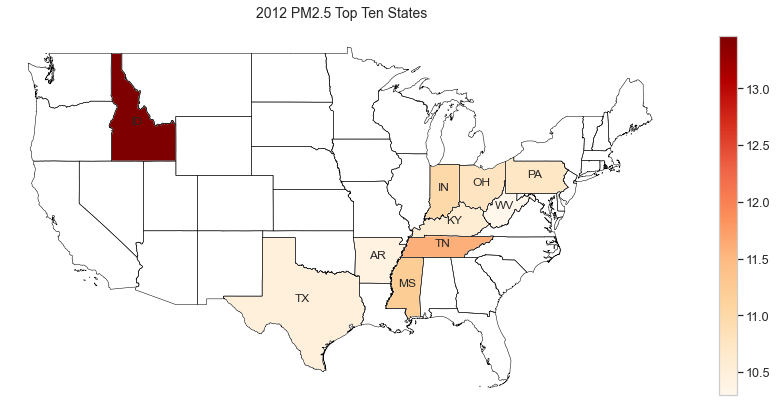

In [119]:
#plot 1999 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 PM2.5 Top Ten States', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#add State abbreviations
d1TopTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d1TopTenMap.plot(ax = ax, column='Mean', legend=True, cmap='OrRd',
                legend_kwds={'orientation': "vertical", "shrink": 0.55})


In [120]:
fig.savefig('pm25_2_2012highest_barchart')

In [121]:
plt.close()

In [122]:
d2TopTen = d2.sort_values('Mean', ascending = False).head(10)
d2TopTen

,State Name,Mean
36,Oregon,14.096686
4,California,12.364399
46,Washington,9.867813
23,Mississippi,9.063922
11,Idaho,8.768651
42,Texas,8.712135
35,Oklahoma,8.639519
12,Illinois,8.626991
2,Arizona,8.575415
9,Georgia,8.529172


Text(0.5, 1.0, '2020 Highest Levels of PM2.5')

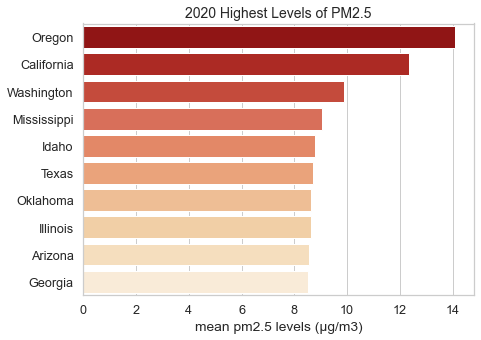

In [123]:
sns.barplot(x = d2TopTen['Mean'], y = d2TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Highest Levels of PM2.5', fontsize=14)

In [124]:
fig.savefig('pm25_2_2020highest_barchart')

In [125]:
plt.close()

In [126]:
#merge datasets
geo_merged2 = pd.merge(stateMap, d2, left_on='NAME', right_on='State Name', how='left')

In [127]:
d2Map = geo_merged2.sort_values('Mean', ascending = False)

In [128]:
d2TopTenMap = d2Map[:10]

<AxesSubplot:title={'center':'2020 PM2.5 Top Ten States'}>

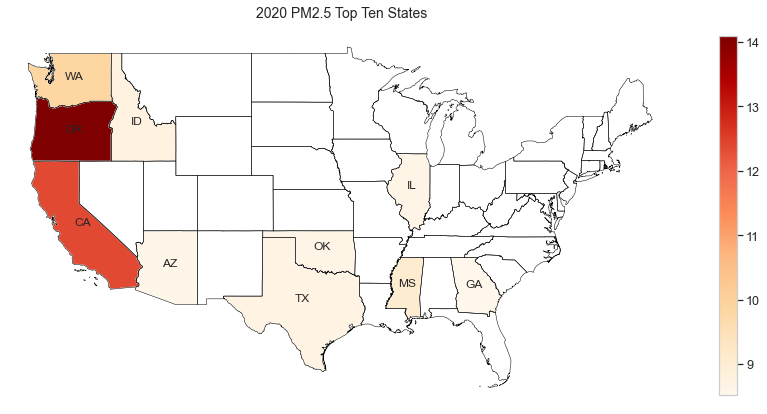

In [129]:
#plot 2020 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 PM2.5 Top Ten States', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()


d2TopTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d2TopTenMap.plot(ax = ax, column='Mean', legend=True, cmap='OrRd',
                legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [130]:
fig.savefig('pm25_2_2020highest_map')

In [131]:
plt.close()

### Which states have the lowest levels of PM2.5?

Text(0.5, 1.0, '1999 Lowest Levels of PM2.5')

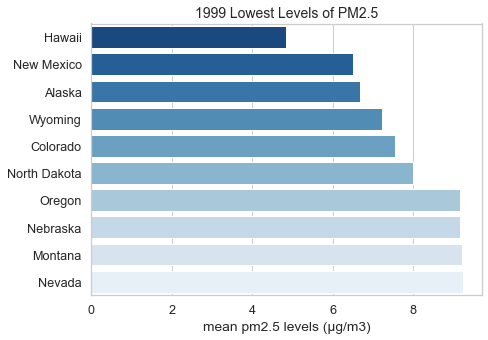

In [132]:
d0LowestTen = d0.sort_values('Mean').head(10)
sns.barplot(x = d0LowestTen['Mean'], y = d0LowestTen['State Name'], palette = 'Blues_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Lowest Levels of PM2.5', fontsize=14)

In [133]:
fig.savefig('pm25_2_1999lowest_barchart')

In [134]:
plt.close()

In [135]:
d0MapSorted = d0Map.sort_values('Mean')
d0LowestTenMap = d0MapSorted[:10]
#d0LowestTenMap

<AxesSubplot:title={'center':'1999 PM2.5 Lowest Ten States'}>

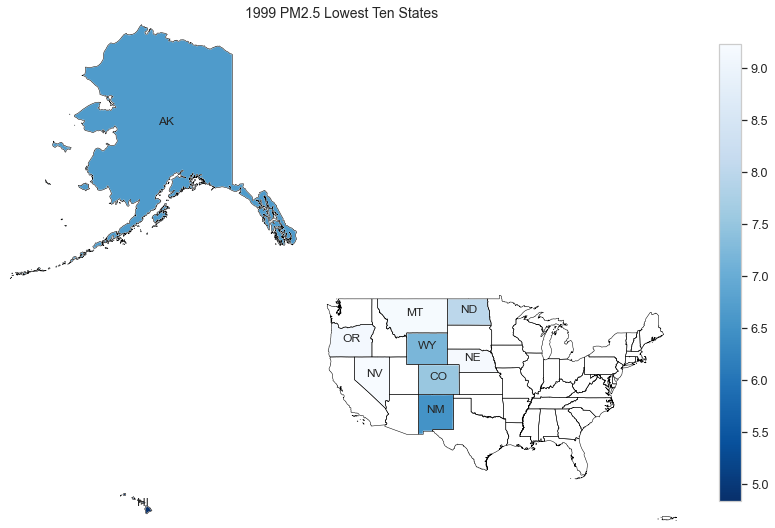

In [136]:
#plot 1999 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 PM2.5 Lowest Ten States', fontsize=14)

#cannot use contentintal US in this map because it includes Hawaii and Alaska
# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

#ax.set_xlim(-14100244, -7200000)
#ax.set_ylim(2600000, 6550000)

#set boundary of map to include Hawaii and Alaska
ax.set_xlim(-20000000, -7200000)
ax.set_ylim(2000000, 11500000)
ax.set_axis_off()

d0LowestTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax = ax, color = 'black', linewidth =.5)
d0LowestTenMap.plot(ax = ax, column ='Mean', legend = True, cmap ='Blues_r',
                   legend_kwds = {'orientation': "vertical", "shrink": 0.70})

In [137]:
fig.savefig('pm25_2_1999lowest_map')

In [138]:
plt.close()

Text(0.5, 1.0, '2012 Lowest Levels of PM2.5')

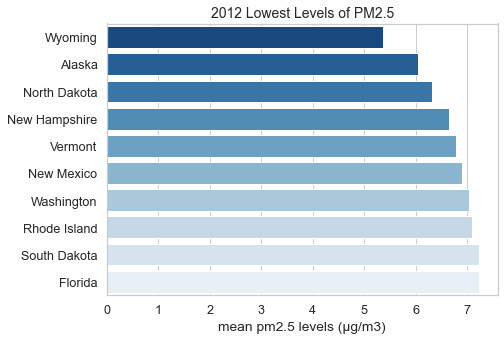

In [139]:
d1LowestTen = d1.sort_values('Mean').head(10)
sns.barplot(x = d1LowestTen['Mean'], y = d1LowestTen['State Name'], palette = 'Blues_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Lowest Levels of PM2.5', fontsize=14)

In [140]:
fig.savefig('pm25_2_2012lowest_barchart')

In [141]:
plt.close()

In [142]:
d1MapSorted = d1Map.sort_values('Mean')
d1LowestTenMap = d1MapSorted[:10]
#d0LowestTenMap

<AxesSubplot:title={'center':'2012 PM2.5 Lowest Ten States'}>

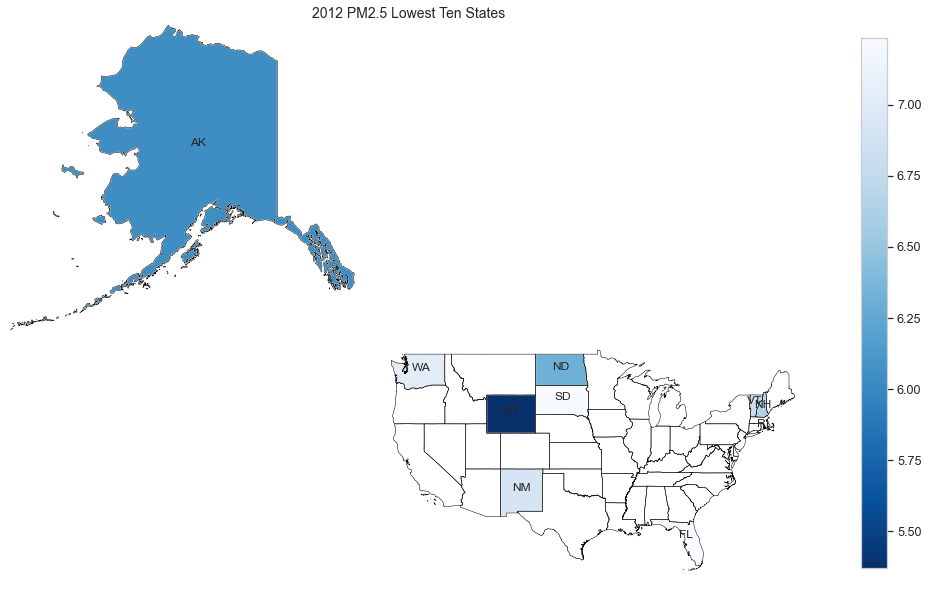

In [143]:
#plot 2012 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(18,15)) 
ax = fig.add_subplot()
ax.set_title('2012 PM2.5 Lowest Ten States', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

#ax.set_xlim(-14100244, -7200000)
#ax.set_ylim(2600000, 6550000)

#cannot use contentintal US in this map because it includes Alaska, custom set boundary
ax.set_xlim(-20000000, -7200000)
ax.set_ylim(2600000, 11500000)
ax.set_axis_off()

d1LowestTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d1LowestTenMap.plot(ax = ax, column='Mean', legend=True,cmap='Blues_r',
                   legend_kwds = {'orientation': "vertical", "shrink": 0.65})

In [144]:
fig.savefig('pm25_2_2012lowest_barchart')

In [145]:
plt.close()

Text(0.5, 1.0, '2020 Lowest Levels of PM2.5')

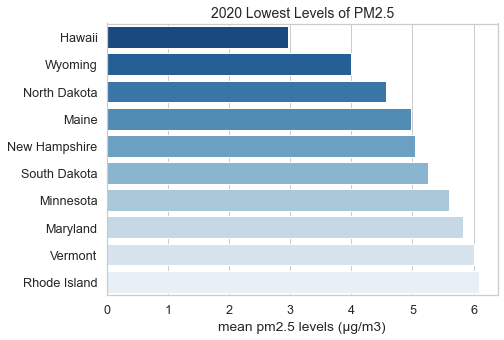

In [146]:
d2LowestTen = d2.sort_values('Mean').head(10)
sns.barplot(x = d2LowestTen['Mean'], y = d2LowestTen['State Name'], palette = 'Blues_r')
plt.xlabel('mean pm2.5 levels (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Lowest Levels of PM2.5', fontsize=14)

In [147]:
fig.savefig('pm25_2_2020lowest_barchart')

In [148]:
plt.close()

In [149]:
d2MapSorted = d2Map.sort_values('Mean')
d2LowestTenMap = d2MapSorted[:10]

<AxesSubplot:title={'center':'2020 PM2.5 Lowest Ten States'}>

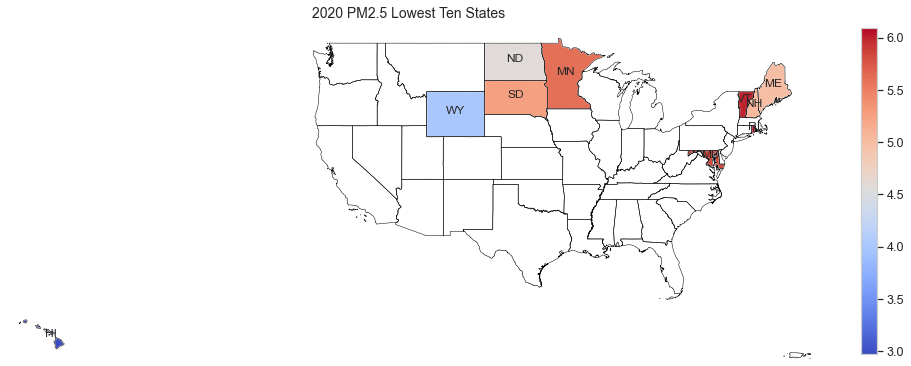

In [150]:
#plot 2020 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(18, 15)) 
ax = fig.add_subplot()
ax.set_title('2020 PM2.5 Lowest Ten States', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

#cannot use contentintal US in this map because it includes Hawaii, custom set boundary
ax.set_xlim(-18000000, -7200000)
ax.set_ylim(2000000, 6500000)
ax.set_axis_off()

d2LowestTenMap.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=12), axis=1);
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d2LowestTenMap.plot(ax = ax, column='Mean', legend=True,cmap='coolwarm',
                   legend_kwds = {'orientation': "vertical", "shrink": 0.40})

In [151]:
fig.savefig('pm25_2_2020lowest_barchart')

In [152]:
plt.close()

### Show entire list of states on bar charts for each year

In [153]:
d0Sorted = d0.sort_values('Mean', ascending=False)

Text(0.5, 1.0, '1999 Average Levels of PM2.5')

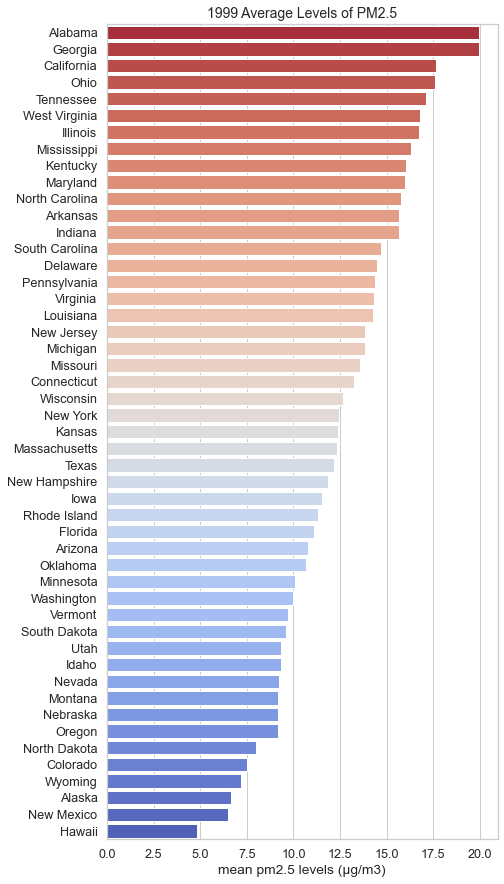

In [154]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,15)}, font_scale=1.15)
sns.barplot(x = d0Sorted['Mean'], y = d0Sorted['State Name'], orient='h', palette = 'coolwarm_r' )
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('1999 Average Levels of PM2.5', fontsize=14)

In [155]:
fig.savefig('pm25_2_1999all_barchart')

In [156]:
plt.close()

In [157]:
d1Sorted = d1.sort_values('Mean', ascending=False)

Text(0.5, 1.0, '2012 Average Levels of PM2.5')

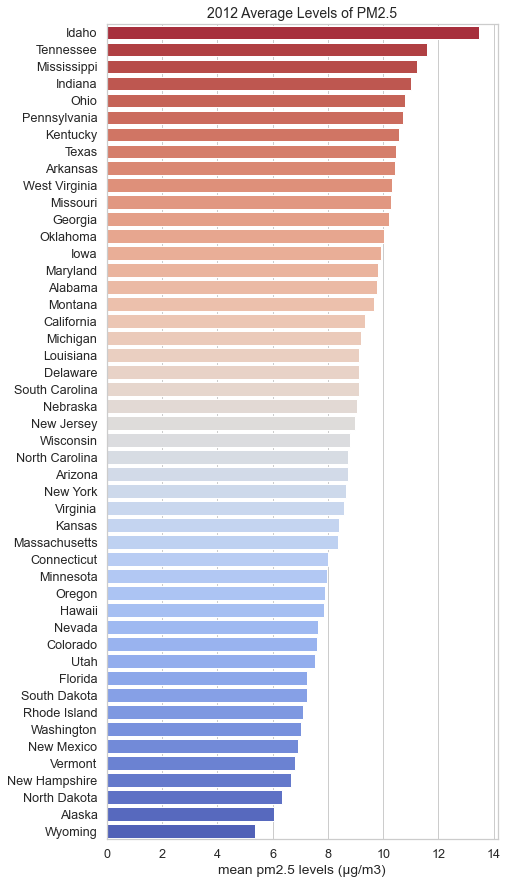

In [158]:
sns.barplot(x = d1Sorted['Mean'], y = d1Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('2012 Average Levels of PM2.5', fontsize=14)

In [159]:
fig.savefig('pm25_2_2012all_barchart')

In [160]:
plt.close()

In [161]:
d2Sorted = d2.sort_values('Mean', ascending=False)

Text(0.5, 1.0, '2020 Average Levels of PM2.5')

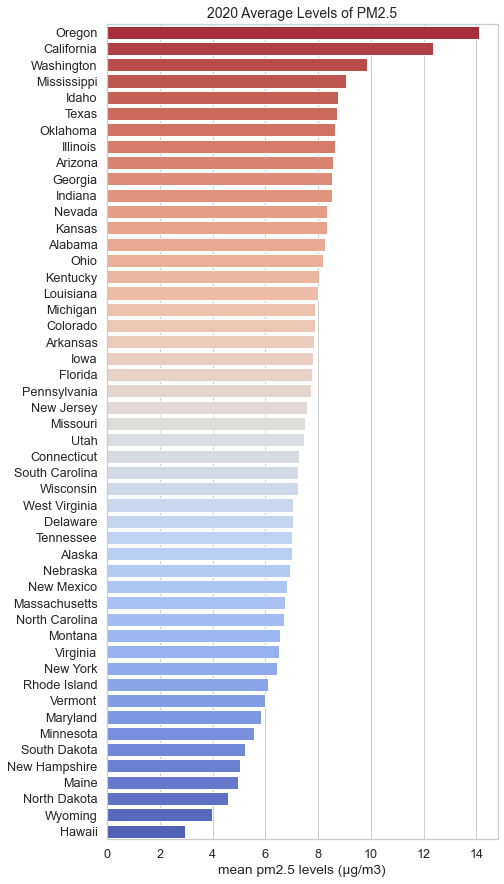

In [162]:
sns.barplot(x = d2Sorted['Mean'], y = d2Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('2020 Average Levels of PM2.5', fontsize=14)

In [163]:
fig.savefig('pm25_2_2020all_barchart')

In [164]:
plt.close()

### Show maps for each year

In [165]:
#Use geodatasets d0Map, d1Map, and d2Map created earlier in this study 

<AxesSubplot:title={'center':'1999 Average PM2.5 Levels by State'}>

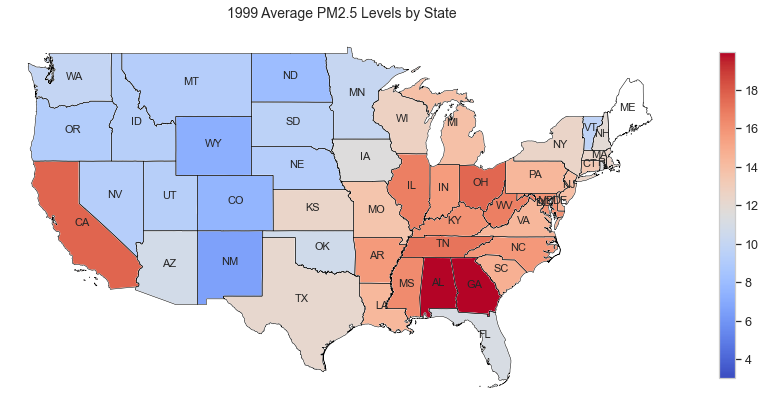

In [166]:
#plot 1999 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

d0Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);
#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d0Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3,
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [167]:
fig.savefig('pm25_2_1999all_map_withUSPC')

In [168]:
plt.close()

<AxesSubplot:title={'center':' 1999 Average PM2.5 Levels by State'}>

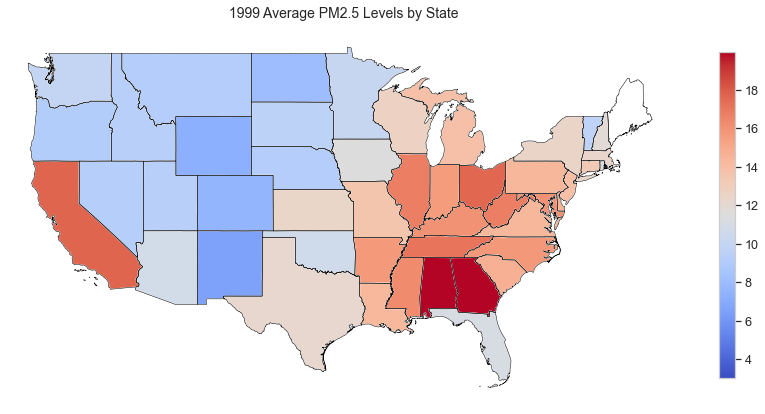

In [169]:
#plot 1999 map without state abbreviations
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title(' 1999 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d0Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3,
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [170]:
fig.savefig('pm25_2_1999all_map_withUSPC')

In [171]:
plt.close()

<AxesSubplot:title={'center':'2012 Average PM2.5 Levels by State'}>

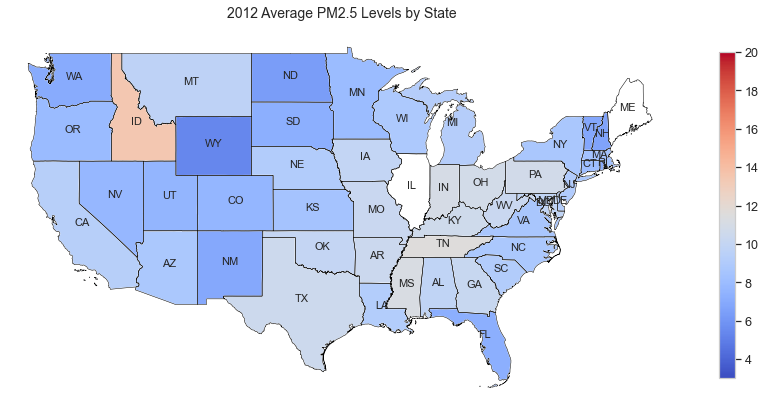

In [172]:
#plot 2012 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

d1Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
#add vmax as highest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d1Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3, vmax=20,
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [173]:
fig.savefig('pm25_2_2012all_map_withUSPC')

In [174]:
plt.close()

<AxesSubplot:title={'center':'2012 Average PM2.5 Levels by State'}>

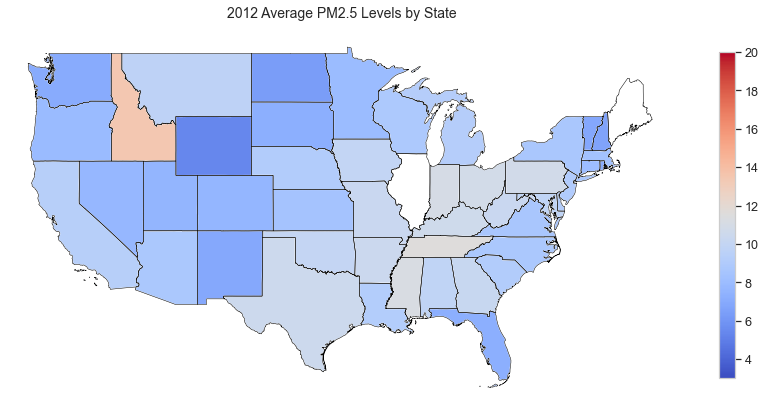

In [175]:
#plot 2012 map without state abbreviations
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
#add vmax as highest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d1Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3, vmax=20,
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [176]:
fig.savefig('pm25_2_2012all_map_noUSPC')

In [177]:
plt.close()

<AxesSubplot:title={'center':'2020 Average PM2.5 Levels by State'}>

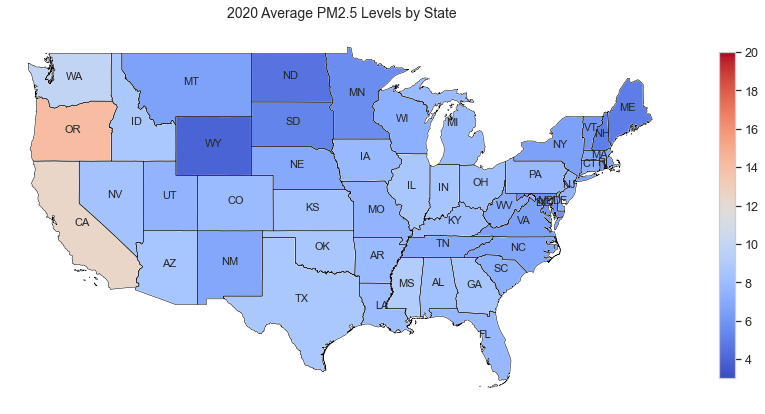

In [178]:
#plot 2020 map
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

d2Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
#add vmax as highest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d2Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3, vmax=20, 
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [179]:
fig.savefig('pm25_2_2020all_map_withUSPC')

In [180]:
plt.close()

<AxesSubplot:title={'center':'2020 Average PM2.5 Levels by State'}>

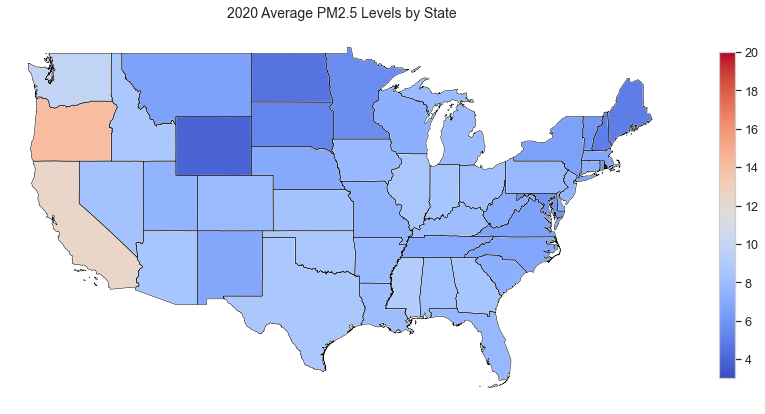

In [181]:
#plot 2020 map without state abbreviations
#Code modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 Average PM2.5 Levels by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

#add vmin as lowest value in years 1999, 2012, and 2020 so maps have the same legend values
#add vmax as highest value in years 1999, 2012, and 2020 so maps have the same legend values
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
d2Map.plot(ax = ax, column='Mean', cmap = 'coolwarm', legend=True, vmin=3, vmax=20, 
                 legend_kwds={'orientation': "vertical", "shrink": 0.50})

In [182]:
fig.savefig('pm25_2_2020all_map_noUSPC')

In [183]:
plt.close()

### Replot bar charts using the same scale 

(0.0, 20.0)

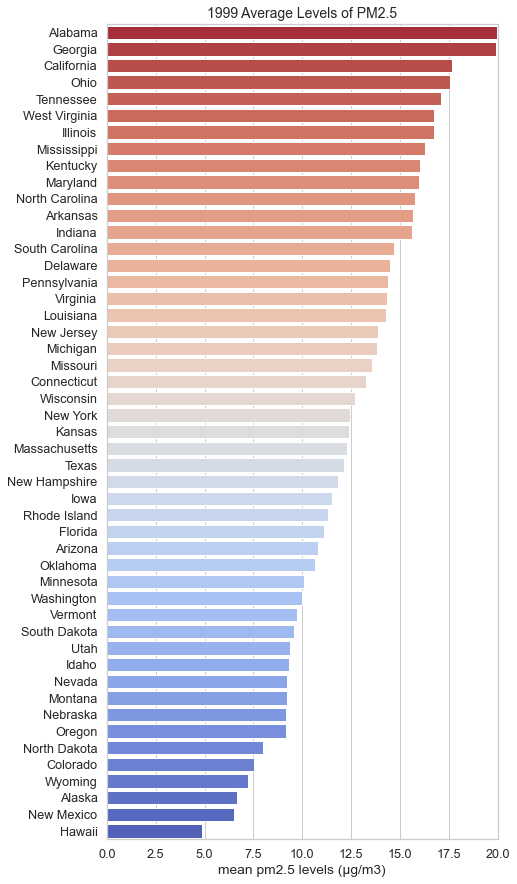

In [184]:
sns.barplot(x = d0Sorted['Mean'], y = d0Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('1999 Average Levels of PM2.5', fontsize=14)
plt.xlim(0, 20)

In [185]:
fig.savefig('pm25_2_1999all_barchart_samescale')

In [186]:
plt.close()

(0.0, 20.0)

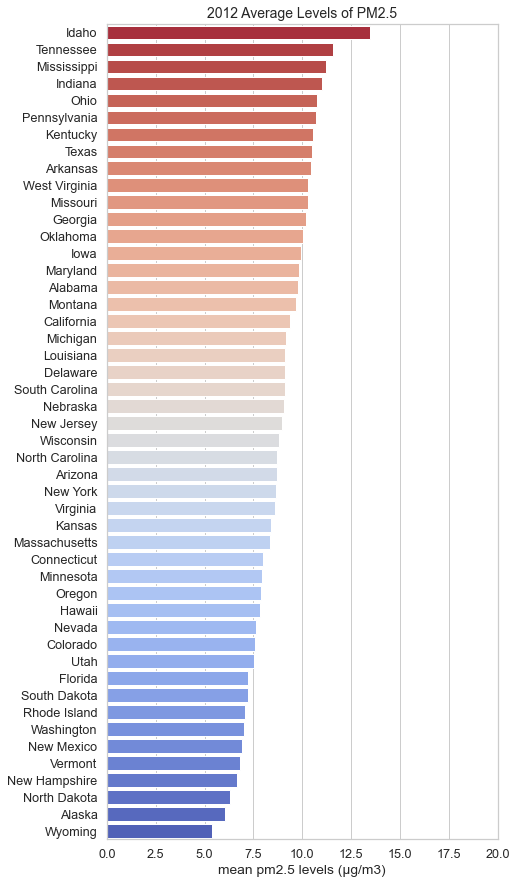

In [187]:
sns.barplot(x = d1Sorted['Mean'], y = d1Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('2012 Average Levels of PM2.5', fontsize=14)
plt.xlim(0, 20)

In [188]:
fig.savefig('pm25_2_2012all_barchart_samescale')

In [189]:
plt.close()

(0.0, 20.0)

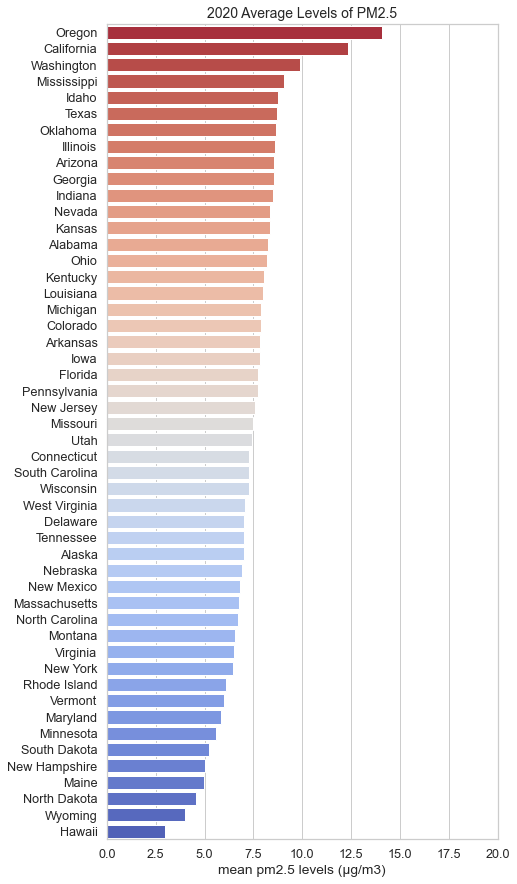

In [190]:
sns.barplot(x = d2Sorted['Mean'], y = d2Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean pm2.5 levels (µg/m3)')
plt.ylabel('')
plt.title('2020 Average Levels of PM2.5', fontsize=14)
plt.xlim(0, 20)

In [191]:
fig.savefig('pm25_2_2020all_barchart_samescale')

In [192]:
plt.close()

### End PM2.5 studies